<a href="https://colab.research.google.com/github/sho12333/deeplearning/blob/master/face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **顔検出**

#icrawler 収集

In [14]:
!pip install icrawler

In [22]:
from icrawler.builtin import BingImageCrawler
crawler = BingImageCrawler(storage={"root_dir": "hasimoto"})
crawler.crawl(keyword="橋本奈々未", max_num=100)

2020-07-26 04:35:11,479 - INFO - icrawler.crawler - start crawling...
2020-07-26 04:35:11,479 - INFO - icrawler.crawler - starting 1 feeder threads...
2020-07-26 04:35:11,480 - INFO - feeder - thread feeder-001 exit
2020-07-26 04:35:11,481 - INFO - icrawler.crawler - starting 1 parser threads...
2020-07-26 04:35:11,490 - INFO - icrawler.crawler - starting 1 downloader threads...
2020-07-26 04:35:11,919 - INFO - parser - parsing result page https://www.bing.com/images/async?q=橋本奈々未&first=0
2020-07-26 04:35:12,895 - INFO - downloader - image #1	http://ww4.sinaimg.cn/mw690/9b80f674jw1ezilnuzebvj20tz18gdsb.jpg
2020-07-26 04:35:15,519 - INFO - downloader - image #2	https://attach.getjetso.com/forum/attachments/month_1501/20150129_bcbbb6bd782145cbad646bN3a0.jpg
2020-07-26 04:35:15,899 - INFO - downloader - image #3	https://i.pinimg.com/736x/39/dd/49/39dd49d28a72027651d76bcd2ace6c83.jpg
2020-07-26 04:35:18,326 - INFO - downloader - image #4	https://attach.getjetso.com/forum/attachments/month_

# Google画像検索

In [4]:
import requests
import random
import shutil
import bs4
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
def image(data):
    if not 'gif' in data:
    
        Res = requests.get("https://www.google.com/search?hl=jp&q=" + data + "&btnG=Google+Search&tbs=0&safe=off&tbm=isch")
        Html = Res.text
        Soup = bs4.BeautifulSoup(Html,'lxml')
        links = Soup.find_all("img")
        link = random.choice(links).get("src")
        return link
def download_img(url, file_name):
    if not 'gif' in url:
        r = requests.get(url, stream=True)
        if r.status_code == 200:
            with open('/content/nanamin/'+file_name+".jpeg", 'wb') as f:
                r.raw.decode_content = True
                shutil.copyfileobj(r.raw, f)


while True:
    num = input("検索回数:")
    data = input("検索ワード:")
    if data !=[]:
        for i in range(200):
            link = image(data)
            download_img(link, str(i))
        print("OK")


検索回数:200
検索ワード:橋本奈々未
OK


KeyboardInterrupt: ignored

# ファイル名変更

In [23]:
import os
import glob


path = "/content/hasimoto"
files = glob.glob(path + '/*')

for i, f in enumerate(files):
    ftitle, fext = os.path.splitext(f)
    os.rename(f, ftitle + '_t' + '{}'.format(i) + fext)

# 顔検出

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import glob
import os

#元画像を取り出して顔部分を正方形で囲み、64×64pにリサイズ、別のファイルにどんどん入れてく


in_dir = "/content/hasimoto/*"
out_dir = "/content/drive/My Drive/sample/gan/train3"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

test_dir="/content/drive/My Drive/sample/gan/test3"
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

in_jpg=glob.glob(in_dir)
in_fileName=os.listdir("/content/hasimoto/")
# print(in_jpg)
# print(in_fileName)
print(len(in_jpg))
for num in range(len(in_jpg)):
    image=cv2.imread(str(in_jpg[num]))
    if image is None:
        #print("Not open:",line)
        continue
    
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
    # 顔認識の実行
    face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
    #顔が１つ以上検出された時
    if len(face_list) > 0:
        for rect in face_list:
            x,y,width,height=rect
            image = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            if image.shape[0]<64:
                continue
            image = cv2.resize(image,(64,64))
    #顔が検出されなかった時
    else:
        print("no face")
        continue
    print(image.shape)
    #保存
    #count=0
    if image.shape==(64, 64, 3):
        fileName=os.path.join(out_dir,str(in_fileName[num]))
        cv2.imwrite(str(fileName),image)
        #count+=1
    else:
        continue
    #print(fileName)

in_dir = "/content/drive/My Drive/sample/gan/train3/*"
in_jpg=glob.glob(in_dir)
img_file_name_list=os.listdir("/content/drive/My Drive/sample/gan/train3")
#img_file_name_listをシャッフル、そのうち2割をtest_imageディテクトリに入れる
random.shuffle(in_jpg)
import shutil
for i in range(len(in_jpg)//5):
    shutil.move(str(in_jpg[i]), "/content/drive/My Drive/sample/gan/test3")

43
(64, 64, 3)
(0, 0, 3)
no face
(64, 64, 3)
(64, 64, 3)
no face
(64, 64, 3)
(64, 64, 3)
no face
no face
(0, 0, 3)
no face
no face
(0, 0, 3)
(64, 64, 3)
(64, 64, 3)
(0, 0, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(0, 0, 3)
(64, 64, 3)
(64, 64, 3)
no face
no face
(64, 64, 3)
no face
no face
(0, 0, 3)
no face
no face
(0, 0, 3)
(64, 64, 3)
(64, 64, 3)
no face
(0, 0, 3)
(0, 0, 3)
no face
(64, 64, 3)
(64, 64, 3)
no face
no face
no face


# 画像の水増し

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

def scratch_image(img, flip=True, thr=True, filt=True):
    # 水増しの手法を配列にまとめる
    methods = [flip, thr, filt]
    # ぼかしに使うフィルターの作成
    filter1 = np.ones((3, 3))
    # オリジナルの画像データを配列に格納
    images = [img]
    # 手法に用いる関数
    scratch = np.array([
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1],
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
    ])
    # 加工した画像を元と合わせて水増し
    doubling_images = lambda f, imag: np.r_[imag, [f(i) for i in imag]]

    for func in scratch[methods]:
        images = doubling_images(func, images)
    return images
    
# 画像の読み込み
in_dir = "/content/drive/My Drive/sample/gan/train3/*"
in_jpg=glob.glob(in_dir)
img_file_name_list=os.listdir("/content/drive/My Drive/sample/gan/train3/")
for i in range(len(in_jpg)):
    print(str(in_jpg[i]))
    img = cv2.imread(str(in_jpg[i]))
    scratch_face_images = scratch_image(img)
    for num, im in enumerate(scratch_face_images):
        fn, ext = os.path.splitext(img_file_name_list[i])
        file_name=os.path.join("/content/drive/My Drive/sample/gan/train3/",str(fn+"."+str(num)+".jpg"))
        cv2.imwrite(str(file_name) ,im)

/content/drive/My Drive/sample/gan/train3/000032_t1.jpg
/content/drive/My Drive/sample/gan/train3/000016_t16.jpg
/content/drive/My Drive/sample/gan/train3/000007_t32.jpg
/content/drive/My Drive/sample/gan/train3/000031_t6.jpg
/content/drive/My Drive/sample/gan/train3/000002_t20.jpg


# ラベル付け

In [129]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
import glob


folder = ["train1","train2","train3"]


X = []
Y = []

for index, name in enumerate(folder):
    dir = "/content/drive/My Drive/sample/gan/" + name
    files = glob.glob(dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        data = np.asarray(image)
        X.append(data)
        Y.append(index)
 
X = np.array(X)
Y = np.array(Y)

992


2020-07-25 14:53:04,931 - INFO - downloader - downloader-001 is waiting for new download tasks


992
36
36


In [31]:
X = X.astype('float32')
X = X / 255.0

In [33]:
# 正解ラベルの形式を変換
Y = np_utils.to_categorical(Y, 3)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# 学習

Train on 532 samples, validate on 134 samples
Epoch 1/100
532/532 [==============================] - 6s 12ms/step - loss: 0.9512 - accuracy: 0.5470 - val_loss: 0.9023 - val_accuracy: 0.5821
Epoch 2/100
532/532 [==============================] - 0s 380us/step - loss: 0.8835 - accuracy: 0.5470 - val_loss: 0.9074 - val_accuracy: 0.5821
Epoch 3/100
532/532 [==============================] - 0s 392us/step - loss: 0.8739 - accuracy: 0.5470 - val_loss: 0.9103 - val_accuracy: 0.5821
Epoch 4/100
532/532 [==============================] - 0s 382us/step - loss: 0.8730 - accuracy: 0.5470 - val_loss: 0.9038 - val_accuracy: 0.5821
Epoch 5/100
532/532 [==============================] - 0s 382us/step - loss: 0.8730 - accuracy: 0.5470 - val_loss: 0.9053 - val_accuracy: 0.5821
Epoch 6/100
532/532 [==============================] - 0s 357us/step - loss: 0.8714 - accuracy: 0.5470 - val_loss: 0.9034 - val_accuracy: 0.5821
Epoch 7/100
532/532 [==============================] - 0s 353us/step - loss: 0.8719 -

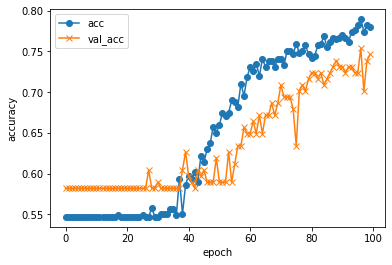

In [38]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model


# モデルの定義
model = Sequential()
model.add(Conv2D(input_shape=(64, 64, 3), filters=32,kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(2, 2), strides=(1, 1), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

#print(model.summary())


# コンパイル
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

# 学習
# model.fit(X_train, y_train, batch_size=32, epochs=50)

#グラフ用
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))

# 汎化制度の評価・表示
score = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
print('validation loss:{0[0]}\nvalidation accuracy:{0[1]}'.format(score))

#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

#モデルを保存
model.save("my_model.h5")

# 予測

(133, 162, 3)
[[0.46143633 0.21252343 0.32604027]]
0


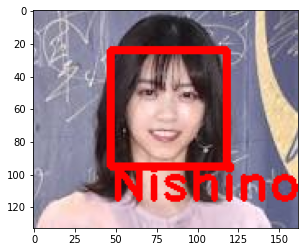

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def detect_face(image):
    print(image.shape)
    #opencvを使って顔抽出
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
    # 顔認識の実行
    face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
    #顔が１つ以上検出された時
    if len(face_list) > 0:
        for rect in face_list:
            x,y,width,height=rect
            cv2.rectangle(image, tuple(rect[0:2]), tuple(rect[0:2]+rect[2:4]), (255, 0, 0), thickness=3)
            img = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            if image.shape[0]<64:
                print("too small")
                continue
            img = cv2.resize(image,(64,64))
            img=np.expand_dims(img,axis=0)
            name = detect_who(img)
            cv2.putText(image,name,(x,y+height+20),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),2)
    #顔が検出されなかった時
    else:
        print("no face")
    return image
    
def detect_who(img):
    #予測
    name=""
    print(model.predict(img))
    nameNumLabel=np.argmax(model.predict(img))
    print(nameNumLabel)
    if nameNumLabel== 0:
        name="Nishino Nanase" 
    elif nameNumLabel==1:
        name="Shiraishi Mai"
    elif nameNumLabel==3:
        name="Hashimoto Nanami"
    return name

model = load_model('/content/my_model.h5')

image=cv2.imread("/content/nisino/193_t65.jpeg")
if image is None:
    print("Not open:")
b,g,r = cv2.split(image)
image = cv2.merge([r,g,b])
whoImage=detect_face(image)

plt.imshow(whoImage)
plt.show()

(140, 114, 3)
[[0.13974288 0.5937786  0.2664785 ]]
1


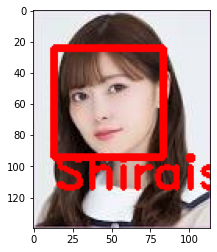

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def detect_face(image):
    print(image.shape)
    #opencvを使って顔抽出
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
    # 顔認識の実行
    face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
    #顔が１つ以上検出された時
    if len(face_list) > 0:
        for rect in face_list:
            x,y,width,height=rect
            cv2.rectangle(image, tuple(rect[0:2]), tuple(rect[0:2]+rect[2:4]), (255, 0, 0), thickness=3)
            img = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            if image.shape[0]<64:
                print("too small")
                continue
            img = cv2.resize(image,(64,64))
            img=np.expand_dims(img,axis=0)
            name = detect_who(img)
            cv2.putText(image,name,(x,y+height+20),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),2)
    #顔が検出されなかった時
    else:
        print("no face")
    return image
    
def detect_who(img):
    #予測
    name=""
    print(model.predict(img))
    nameNumLabel=np.argmax(model.predict(img))
    print(nameNumLabel)
    if nameNumLabel== 0:
        name="Nishino Nanase" 
    elif nameNumLabel==1:
        name="Shiraishi Mai"
    elif nameNumLabel==3:
        name="Hashimoto Nanami"
    return name

model = load_model('/content/my_model.h5')

image=cv2.imread("/content/siraisi/15_s161.jpeg")
if image is None:
    print("Not open:")
b,g,r = cv2.split(image)
image = cv2.merge([r,g,b])
whoImage=detect_face(image)

plt.imshow(whoImage)
plt.show()

(140, 130, 3)
[[0.35762182 0.279285   0.36309323]]
2


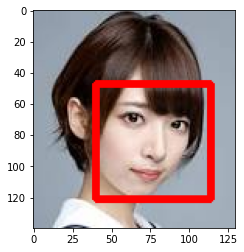

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def detect_face(image):
    print(image.shape)
    #opencvを使って顔抽出
    image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_alt.xml")
    # 顔認識の実行
    face_list=cascade.detectMultiScale(image_gs, scaleFactor=1.1, minNeighbors=2,minSize=(64,64))
    #顔が１つ以上検出された時
    if len(face_list) > 0:
        for rect in face_list:
            x,y,width,height=rect
            cv2.rectangle(image, tuple(rect[0:2]), tuple(rect[0:2]+rect[2:4]), (255, 0, 0), thickness=3)
            img = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
            if image.shape[0]<64:
                print("too small")
                continue
            img = cv2.resize(image,(64,64))
            img=np.expand_dims(img,axis=0)
            name = detect_who(img)
            cv2.putText(image,name,(x,y+height+20),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),2)
    #顔が検出されなかった時
    else:
        print("no face")
    return image
    
def detect_who(img):
    #予測
    name=""
    print(model.predict(img))
    nameNumLabel=np.argmax(model.predict(img))
    print(nameNumLabel)
    if nameNumLabel== 0:
        name="Nishino Nanase" 
    elif nameNumLabel==1:
        name="Shiraishi Mai"
    elif nameNumLabel==3:
        name="Hashimoto Nanami"
    return name

model = load_model('/content/my_model.h5')

image=cv2.imread("/content/nanamin/93_s155_s50.jpeg")
if image is None:
    print("Not open:")
b,g,r = cv2.split(image)
image = cv2.merge([r,g,b])
whoImage=detect_face(image)

plt.imshow(whoImage)
plt.show()